# Practical Machine Learning

## 2.- Stage II: 
## _" The importance of caret package in the ML process. "_

Welcome to the stage II _dataAnalyst_player1_.
If you are hereis because you already has the basis of the 'steps'(strategy) along the machine learning process. Now we will put over the table new tools. 'Caret' is a R library to cope with bigger data for more complex algorithms. Why using it? because we have much more data than we saw before, and because it is optimized to get results faster and in unexplored but, many times, better ways.
So let's start with the process again: 
1. Question (ok)
2. Collecting data
3. Choosing features
4. Running the algorithm 'A'
5. Evaluation

Are you happy with the results? 

If *not*, let's run all the process again with little arranges. So : 
2. Collecting more data! (and more and more...)
3. Choosing other more features(or other differents)
4. Running the same or other algorithm
5. Re-evaluation.
Are you happy with the results? 
If *not*, well.. maybe you are not an expert. And you need to be more in deeper about what are u doing wrong... Let's see everything you are doing more in deeper. Step-by-step. Take it easy man!



### _2.-Collected data_
Golden rule: More data, (normally) better results.

* Prepare your data
 * Data slicing
 * Training options
 * Plotting predictors



In [ ]:

library(caret);
#install.packages("e1071");
library(e1071);
library(kernlab);

#1.-Loading data 'spam' from kernlab to use it as an example for caret package
print("Loading data 'spam' from kernlab to use it as an example of: using caret package" )
data(spam)
cat("Loaded succesfully! \nBasic checking of:\n\t-1)class of data loaded\n\t-2)colnames\n\t-3)str\n\t-4)spam")

#1)
class(spam)
#2)
colnames(spam)
#3)
str(spam)
#4)
dim(spam)

#Creating a data partition from the spam$type column
print("Creating a data partition from the spam$type column, which contains only these values")
unique(spam$type)
print("using createDataPartition function we create a matrix with 75% of indexes of the total dataFrame. we store this data in a variable called: inTrain")
inTrain <- createDataPartition(y=spam$type,
                                p=0.75,
                                list=FALSE)

print("Class of data 'inTrain':")
class(inTrain)
print("Colnames of matrix 'inTrain':")
colnames(inTrain)
print("take a look of the first rows of the matrix")
head(inTrain)

print("extract those inTrain indexes from the dataset to create a trainingDataSet")
training <- spam[inTrain,]

print("the rest of indexes not 'inTrain' will be the testDataSet")
testing <- spam[-inTrain,]

print("checking the dimensions of the training dataset. n? of rows should be a 75% of the original data frame")
dim(training)


print("#============================")
print("FITTING A MODEL.") 
print(" this model would be able to describe the behavior of this data")
#SMAP Example: Fit a model
print("setting a seed to make this data reproducible. seed = 32343")
set.seed(32343)

print("____________________________________")
print("train(type ~., data = training, method = 'glm'')")
print("____________________________________")
modelFit <- train(type ~., data = training, method = "glm") 
print()
class(modelFit)

print("I use ~. (tilde and dot) to say use all the other variables in this data frame in order to predict the type. ")
print("And I tell which data ser I want to build the training model on and so, in this case, the training data set we created on the precious slide.")
print("And then I just tell which of the methods that I'd like to use, and so you can use GLM or you can use a bunch of other different models.")

#!!!#  And so what this does is it'll create a model fit from the train function, and as we use the 3451 samples in a training set and the 57 predictors to predict which class you're belonging to based on a model, a GLM model.  
#      And so what it can do is it can do a bunch of different ways  of testing whether this model will work well  and using it to select the best model.  And in this case it used resampling.  And it does bootstrapping with 25 replicates, and it corrects  for the potential bias that might come from bootstrap sampling.
 

cat("\tSo once we fit that model, we can actually look at the model, and so the way we can do that is look at the finalModel component of the modelFit object. \n\tAnd the way you do that is you take the modelFit object, and then you type dollar sign and then always the same finalModel. It will tell you what are the actual fitted values that you got for that GLM model.")
modelFit$finalModel

#
cat("\tThen you predict on new samples by using the predict command.
Again, it's a unified framework, so we just type predict. We pass it the modelFit that we got from the train, function in carrot, and we pass it which data we would like it to predict on. \n\tSo in this case, the new data is the testing data.")
 
cat("_____________________________________\n\tpredictions <- predict(modelFit, newdata=testing)\n_____________________________________")
predictions <- predict(modelFit, newdata=testing)
predictions


cat("\t When you do that, it will give you a set of predictions that correspond to the responses, and you can use those to TRY TO EVALUATE WHETHER YOUR MODEL FIT WORKS VERY WELL OR NOT.\n\tOne way that you can do that is by calculating the confusion matrix, so that's using this confusion matrix function, and so note the capital M here. Don't miss that when you're typing confusion matrix. Then you pass in the predictions that you got from your model fit. And then the actual outcome on the testing samples. So in this case, it was the type or whether it was spam or ham message. And then it will record the confusion matrix.\n\t")


print("confusionMatrix(predictions, testing$type)")
confusionMatrix(predictions, testing$type)

cat("So it'll tell you a table for which of the cases that you predicted to be nonspam or  actually nonspam, which is the cases where it was  spam, and you predicted to be spam and so forth\n\tAnd then it gives you a bunch of summary statistics.\n\tSo for example, the accuracy, a 95 percent confidence interval for the accuracy,  and then a bunch of information about how well they correspond in other categories.")
# So, for example, the sensitivity and the specificity of that.  So the confusion matrix function wraps a bunch of different accuracy measures  that you might want to get out when you're evalutating the model fit. For a lot more information about caret, we're going to cover a lot of it  in this class in terms of how do you actually apply the caret package.  
#!!!#  But I found that these tutorials are actually very nice, and they can  be very useful for covering material that we don't cover in this class. And there's also a very nice paper in the journal of  statistical software that introduces the caret  package if you want further information.



In [ ]:
#=====================
#Week 2:
#Training Options
#=====================
cat("loading required libraries for this example:\n\t-caret\n\t-kernlab")
library(caret);
library(kernlab);
print("loading dataset 'spam'")
data(spam);

print("procedure of createDataPartition")
inTrain <- createDataPartition(y= spam$type, 
                               p=0.75,
                               list=FALSE)
training <- spam[inTrain,]
testing <- spam[-inTrain,]

#dim(training)

print("procedure of train") #more info about '~' tilde in https://www.datacamp.com/community/tutorials/r-formula-tutorial
modelFit <- train(type~., data=training, method= "glm")

prnt("you can use a large set of options for training")# So, here are a couple of them. One, you can use this preProcess parameter to set a bunch of preprocessing options. We'll talk about that in a future lecture.  You can also set weights.  In other words, you can upweight or downweight certain observations.  These are particularly useful if you have very unbalanced training set where you  have a lot more examples of one type than another.  You can set the metric, so by default for factor variable, in other words for  categorical variables the default metric is accuracy that it's trying to maximize. For continuous variables it's the root mean squared error,  like we talked about in a previous lecture.



args(caret::train.default)

cat('_______________________________________\n
  train(x, y, method = "rf", preProcess = NULL, ...,
    weights = NULL, metric = ifelse(is.factor(y), "Accuracy", "RMSE"),
    maximize = ifelse(metric %in% c("RMSE", "logLoss", "MAE"), FALSE, TRUE),
    trControl = trainControl(), tuneGrid = NULL,
    tuneLength = ifelse(trControl$method == "none", 1, 3))\n
________________________________________________________________
    ')
cat("you can use a large set of options for training.
 So, here are a couple of them.
      \tOne, you can use this preProcess parameter to set a bunch of preprocessing options.We'll talk about that in a future lecture.
      \tYou can also set weights. In other words, you can upweight or downweight certain observations. These are particularly useful if you have very unbalanced training set where you have a lot more examples of one type than another.
      \tYou can set the metric, so by default for factor variable, in other words for
      categorical variables the default metric is accuracy that it's trying to maximize.
      \tFor continuous variables it's the root mean squared error, like we talked about in a previous lecture.")

print("You can also set a large number of other control parameters using this trControl parameter here and you have to pass it a call to this particular function, trainControl, which we'll talk about in a couple of slides.")

args(trainControl)

#!!!#
#So the Metric options are built-in to the train function for continuous outcomes. Our RMSE, or root mean squared error. You can also use RSquared. This is the RSquared that you get from a regression model if you remember that from the inference class. RSquared is a measure of linear agreement between the variables that you're predicting and the variables that you predict with.


# For resampling, there are a bunch of methods that are offered,so this is again passed to the trainControl function.
# You can use standard bootstrapping, you can use bootstrapping that adjusts for the fact that multiple samples are repeatedly resampled when you're doing that subsampling. This will reduce some of the bias due to bootstrapping. 
# You can use cross validation which is a method that we've talked about in previous lectures. 
# You could also use repeated cross validation if you want to do sub cross validation with different random draws. 
# You could use leave one out cross validation and remember there's a bias during its trade off between using large number of folds and smaller number of folds when doing cross validation. 
# You can also tell it the number of bootstrap samples or the number of subsamples to take and the number of times to repeat that subsampling if you're doing something like repeated cross validation. 
#   All of these parameters can be set. In general the defaults work pretty well, but if you have large numbers of samples or you have a model that requires fine tuning across a large number of parameters, you may want to increase for example the number of cross-validation or bootstrap samples that you take.


#Setting the seed

set.seed(1235)
modelFit2 <- train(type~., data = training, method=  "glm")
modelFit2


 


In [ ]:
#===================
#Ploting predictors
#===================
#Tested on R version 3.3.2
#Ubuntu 16.04 LTS


###===========================================
#1#-Installing and calling required libraries
###===========================================

#install.packages("ISLR")
library(ISLR)
#install.packages("ggplot2")
library(ggplot2)
#install.packages("caret")
library(caret)
#install.packages("Hmisc")
library(Hmisc)
#Thirs library once loaded and runned restart the computer. It enable to create some plots.
library(gridExtra)
#install.packages("Cairo")
#setHook(packageEvent("grDevices", "onLoad"),
#        function(...) grDevices::X11.options(type='cairo'))
#options(device='x11')


###====================================================
#2#-Loading dataset Wage and looking at the 'landscape'
###====================================================

data(Wage)
summary(Wage)


###=========================
#3#-Get trainings/test_sets 
###=========================
#...by mean of function 'createDataPartition'

inTrain <- createDataPartition(y=Wage$wage,
                            p=0.7,
                            list= FALSE)
training <- Wage[inTrain,];
testing <- Wage[-inTrain,];
#dim(training); --[1] 2102   11
#dim(testing); --[1] 898  11



###==========
#4#-Plotting
###==========
#[1] Across different features
#...by mean of function 'featurePlot' (Wrapper for Lattice Plotting of Predictor Variables)

#Feature plot (caret package)
featurePlot(x = training[, c("age", "education", "jobclass")], 
            y = training$wage,
            plot = "pairs")

#[2] Across 2 features (2-D plot)
#NOTE: If you have problems in Ubuntu for plotting because the font Helvetica, just try the procedure described here:
#sudo apt-get install t1-xfree86-nonfree ttf-xfree86-nonfree ttf-xfree86-nonfree-syriac xfonts-75dpi xfonts-100dpi
#From: https://askubuntu.com/questions/449578/x11-font-adobe-helvetica-s-s-d-face-2-at-size-11-could-no
#Later restart the computer

#Qplot (ggplot2 package)
qplot(age, wage, data = training)

#[3] Across 2 features (2-D plot) with different colors based in other 3rd feature
#Qplot with color (ggplot2 package)
qplot(age, wage, colour = jobclass, data = training)


#Explanation?
#[4]  Across 2 features (2-D plot) with different colors based in other 3rd feature. With lines 
#Add regression smoothers (ggplot2 package)
qq <- qplot(age, wage, colour = education, data = training)
qq+ geom_smooth(method= "lm", formula = y~x) #linear regression formula


#[5]Making factors for BoxPlots
#cut2, making factors (Hmisc package)
cutWage <- cut2(training$wage, g = 3)
table(cutWage)

#Boxplots with cut2

p1 <- qplot(cutWage, age, data=training, fill=cutWage, geom= c("boxplot"))

p1

#Boxplots with points overlayed
p2 <- qplot(cutWage, age, data = training, fill=cutWage, geom=c("boxplot", "jitter"))
grid.arrange(p1,p2,ncol=2)

#Tables
t1 <- table(cutWage, training$jobclass)
t1


prop.table(t1,1)

#[5] Histogram density
#Density plots
qplot(wage, colour= education, data = training, geom= "density")





### _3.-Pre-process your data_
Think about how to organize the variables to optimize the process of classification


* Basic preprocessing
* Covariate creation
* Preprocesing with Principal Component analysis




Basic pre-processing
 In this step we are going to split the dataset in a training set, test set and cross-validation set.

	The training set : It is neccesary to train the machine, around this data there will be different approaches to get the best mathematical equation

and this equation will be able to classify if the next input data will be in a cluster or in other cluster.

	The test set: It is neccessary to create a set for testing if the trained machine with the mathematical equation is able to classify correctly

	Cross-validation set: It is neccessary to create a cross-validation set for re-train and trying to exclude the overfitting error.

Installing package into ‘/home/koryclik/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)
Installing package into ‘/home/koryclik/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)



============Plotting histogram=============


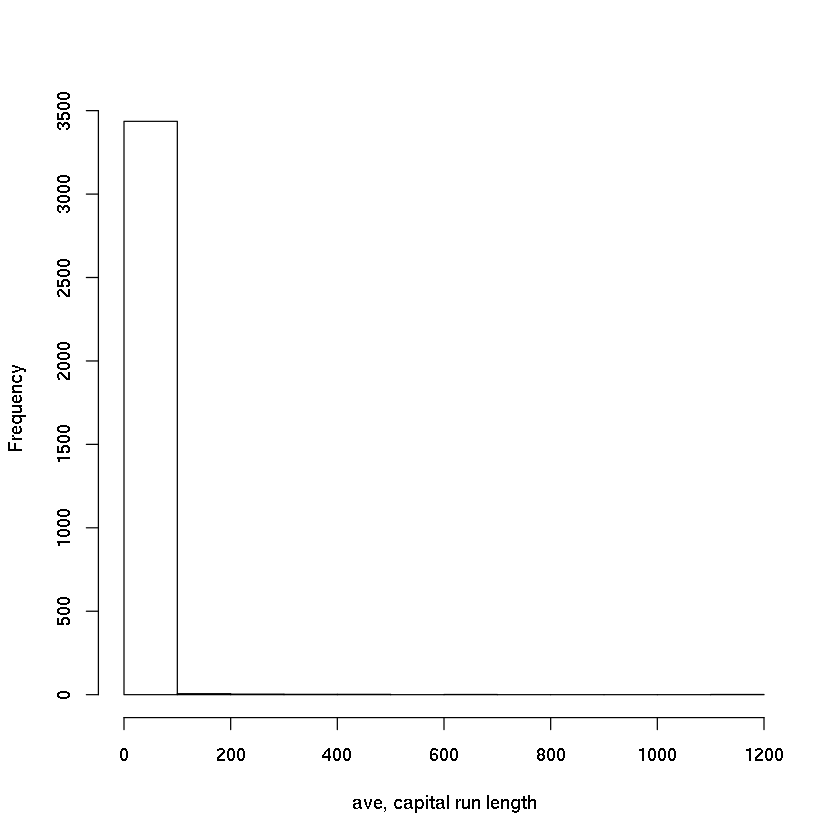

In [3]:
#week2_IV_basicPreprocessing
cat("\n===================\nBasic pre-processing\n===================\n ")

cat("In this step we are going to split the dataset in a training set, test set and cross-validation set.\n
\tThe training set : It is neccesary to train the machine, around this data there will be different approaches to get the best mathematical equation\n
and this equation will be able to classify if the next input data will be in a cluster or in other cluster.\n
\tThe test set: It is neccessary to create a set for testing if the trained machine with the mathematical equation is able to classify correctly\n
\tCross-validation set: It is neccessary to create a cross-validation set for re-train and trying to exclude the overfitting error.")
library(caret);
library(kernlab);
install.packages("e1071")
library(e1071)
install.packages("RANN")
library(RANN)

data(spam)

#So, why preprocess? Here again I'm loading the later, the caret package, and I'm learning the kernlab package and then I'm attaching the spam data. Again just like I talked about previously, when you're deciding how to preprocess data, or how to explore data we only look at the training set. So, we split data right away into training and testing data and we set the testing data aside for later. Now if I look at one of the variables, so again, this is spam data, so we're trying to predict whether the data is spam or if it's good emails, ham. And, so the variables are things like how many capitals do we see in a row?   What's the run length for the number of capitals in a row in an email? If you take, make a histogram of those values, you see, for example,. That almost all of the run links are very small, but there are a few that are much, much larger. This is an example of a variable that is very skewed, and, so it's very hard to deal with in model based predictors and so you might want to preProcess. So, if you take the mean of this variable, it's about 4.7. But the standard deviation is huge, it's much much larger. So, it's much more highly variable variable. And so, what you might want to do is do some sort of preprocessing, so the machine learning algorithms don't get tricked by the fact that it's skewed and highly variable.

inTrain <- createDataPartition(y=spam$type,
                                p=0.75,
                                list=FALSE)

training <- spam[inTrain,]
testing <- spam[-inTrain,]

cat("\n============Plotting histogram=============\n")
hist(training$capitalAve,main="", xlab="ave, capital run length")



Mean of the capitalAve values in the training set

[1] 4.92794

Standard deviation of the capitalAve values in the training set

[1] 27.83577

Calculating the mean of trainCapAveS, which is the values of the trainCapAve-meanOf 

[1] -1.464172e-17

Calculating the standard deviation of trainCapAveS

[1] 1

Calculating the mean of testCapAveS, which is the values of the trainCapAve-meanOf

[1] 0.03788402

Calculating the standard deviation of testCapAveS

[1] 1.482615

preProcess....Calculating the trainCapAveS

[1] -1.464172e-17

[1] 1

Calculating the testCapAveS

[1] 0.03788402

[1] 1.482615

Running the whole process at once

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: algorithm did not converge”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted 

Generalized Linear Model 

3451 samples
  57 predictor
   2 classes: 'nonspam', 'spam' 

Pre-processing: centered (57), scaled (57) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 3451, 3451, 3451, 3451, 3451, 3451, ... 
Resampling results:

  Accuracy   Kappa    
  0.9236773  0.8393298


plotting the results

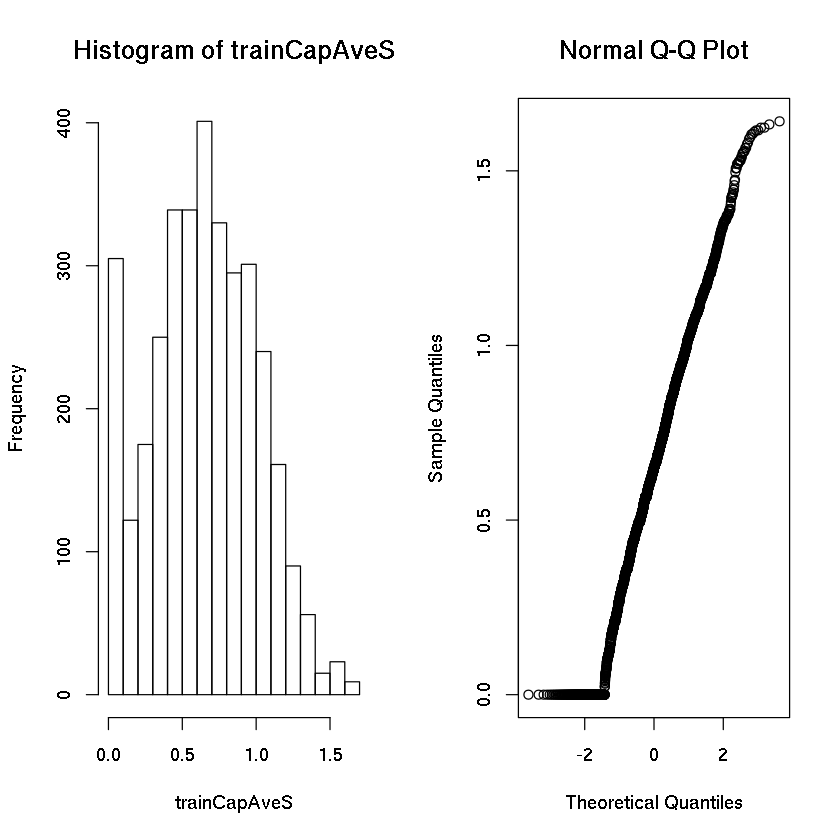

In [4]:

#-----
cat("Mean of the capitalAve values in the training set")

mean(training$capitalAve)

cat("Standard deviation of the capitalAve values in the training set")

sd(training$capitalAve)

#------
cat("Calculating the mean of trainCapAveS, which is the values of the trainCapAve-meanOf ")

trainCapAve  <- training$capitalAve
trainCapAveS <- (trainCapAve - mean(trainCapAve))/sd(trainCapAve)
mean(trainCapAveS)

#----------
cat("Calculating the standard deviation of trainCapAveS")
sd(trainCapAveS)

#-----------
cat("Calculating the mean of testCapAveS, which is the values of the trainCapAve-meanOf")
testCapAve <- testing$capitalAve
testCapAveS <- (testCapAve -mean(trainCapAve))/sd(trainCapAve)
mean(testCapAveS)

#------------------
cat("Calculating the standard deviation of testCapAveS")
sd(testCapAveS)


#-----
cat("preProcess....")
preObj <- preProcess(training[,-58], method=c("center","scale"))

cat("Calculating the trainCapAveS")

trainCapAves <- predict(preObj, training[,-58])$capitalAve
mean(trainCapAveS)
sd(trainCapAveS)

#-----------
cat("Calculating the testCapAveS")

testCapAveS <-predict(preObj, testing[,-58])$capitalAve
mean(testCapAveS)
sd(testCapAveS)

#-----------
cat("Running the whole process at once")

set.seed(32343)
modelFit <- train(type ~.,data=training, preProcess=c("center","scale"), method="glm")

modelFit

preObj <- preProcess(training[,-58], method=c("BoxCox"))
trainCapAveS <- predict(preObj, training[,-58])$capitalAve

cat("plotting the results")
par(mfrow=c(1,2));
hist(trainCapAveS);
qqnorm(trainCapAveS)

#========================



In [5]:
cat("Running the whole process at once")

set.seed(13343)

#Make some values NA
training$capAve <- training$capitalAve
selectNA <- rbinom(dim(training)[1], size=1, prob=0.05)==1
training$capAve[selectNA] <- NA

#Impute and standardize
preObj <- preProcess(training[,-58],method="knnImpute")
capAve <- predict(preObj, training[, -58])$capAve

# Standarize true values
capAveTruth <- training$capitalAve
capAveTruth <- (capAveTruth-mean(capAveTruth))/sd(capAveTruth)

cat("\ncalculating quantiles")

#---Standarizing imputing data
quantile(capAve-capAveTruth)

quantile((capAve-capAveTruth)[selectNA])

quantile((capAve-capAveTruth)[!selectNA])

Running the whole process at oncecalculating quantiles

0%           25%           50%           75%          100% 
-0.9925195516 -0.0010554815  0.0003161339  0.0009694560  0.1492923308

0%          25%          50%          75%         100% 
-0.428507186 -0.011086546  0.004622045  0.021209952  0.149292331

0%           25%           50%           75%          100% 
-0.9925195516 -0.0010002108  0.0002935745  0.0009089966  0.0014504238

In [9]:
###week2_V_Covariate creation
cat("\n=================================================\nCovariate creation\n=================================================\n
Basic idea: convert factor variables to INDICATOR variables")
library(kernlab); 
data(spam)

cat("square up the values of capitalAve ")
spam$capitalAveSq <- spam$capitalAve^2 

cat("\nNow we are going to work with Wage data\n")

#Load example data
#install.packages("ISLR")
library(ISLR);
library(caret);
data(Wage);

cat("\ndataPartition of Wage data\n")
inTrain <- createDataPartition(y=Wage$wage,
                                 p=0.7,
                                 list=FALSE)

training <- Wage[inTrain,];
testing <- Wage[-inTrain,]

#Common covarites to add, dummy variables
#-basic idea- convert factor variables to INDICATOR variables

cat("\ntable data\n")
table(training$jobclass)

cat("\ndummy variables\n")
dummies <- dummyVars(wage~jobclass, data = training)
head(predict(dummies, newdata=training))

#Removing Zero Covariates
cat("removing zero covariates")
nsv <- nearZeroVar(training, saveMetrics = TRUE)
nsv







Covariate creation

Basic idea: convert factor variables to INDICATOR variablessquare up the values of capitalAve 
Now we are going to work with Wage data

dataPartition of Wage data

table data



 1. Industrial 2. Information 
          1088           1014 


dummy variables


,jobclass.1. Industrial,jobclass.2. Information
231655,1,0
86582,0,1
155159,0,1
11443,0,1
376662,0,1
450601,1,0


removing zero covariates

,freqRatio,percentUnique,zeroVar,nzv
year,1.000000,0.33301618,FALSE,FALSE
age,1.219178,2.90199810,FALSE,FALSE
maritl,3.157205,0.23786870,FALSE,FALSE
race,8.994819,0.19029496,FALSE,FALSE
education,1.397541,0.23786870,FALSE,FALSE
region,0.000000,0.04757374,TRUE,TRUE
jobclass,1.072978,0.09514748,FALSE,FALSE
health,2.550676,0.09514748,FALSE,FALSE
health_ins,2.194529,0.09514748,FALSE,FALSE
logwage,1.012048,19.12464320,FALSE,FALSE


In [10]:
#Spline basis
library(splines)
cat("working with splines")

bsBasis <- bs(training$age, df=3)
bsBasis



working with splines

1,2,3
0.00000000,0.00000000,0.000000000
0.23685006,0.02537679,0.000906314
0.43081384,0.29109043,0.065560908
0.36252559,0.38669397,0.137491189
0.30633413,0.42415495,0.195763821
0.42415495,0.30633413,0.073747105
0.37763083,0.09063140,0.007250512
0.44035531,0.25969672,0.051051492
0.33553758,0.40743849,0.164915579
0.41633799,0.32117502,0.082587862


 fitting curves with splinesSPlines on the test set

1,2,3
0.00000000,0.00000000,0.000000000
0.23685006,0.02537679,0.000906314
0.43081384,0.29109043,0.065560908
0.36252559,0.38669397,0.137491189
0.30633413,0.42415495,0.195763821
0.42415495,0.30633413,0.073747105
0.37763083,0.09063140,0.007250512
0.44035531,0.25969672,0.051051492
0.33553758,0.40743849,0.164915579
0.41633799,0.32117502,0.082587862


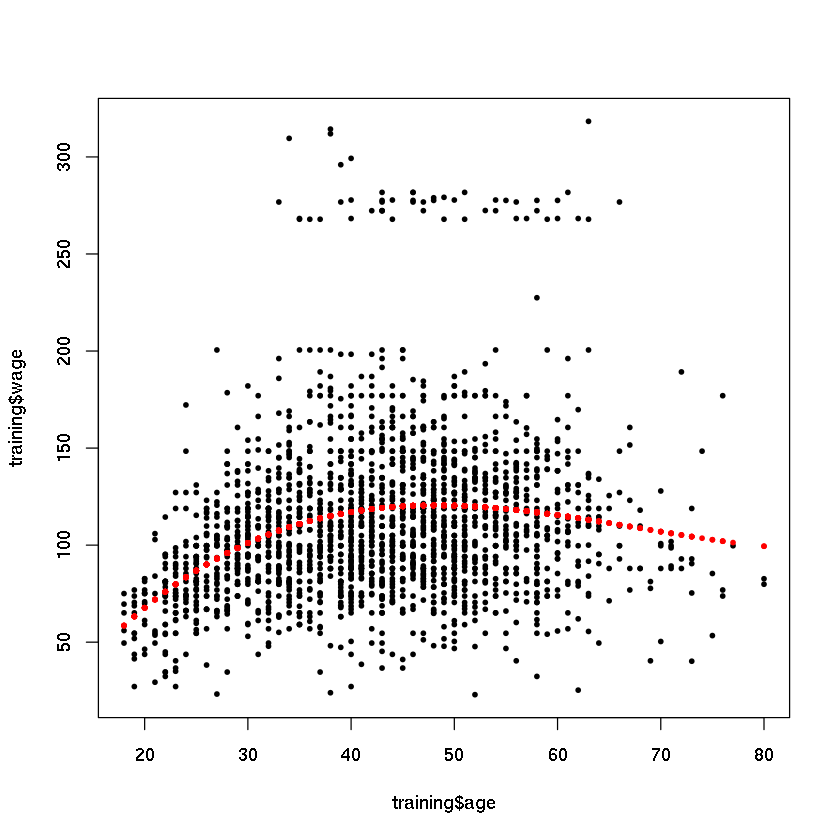

In [11]:
#Fitting curves with splines
cat(" fitting curves with splines")

lm1 <- lm(wage~bsBasis, data=training)
plot(training$age, training$wage, pch=19, cex= 0.5)
points(training$age, predict(lm1, newdata=training), col = "red", pch=19, cex = 0.5)

#SPlines on the test set
cat("SPlines on the test set")

predict(bsBasis, age = testing$age)

In [ ]:
#=================================================
#PRE-PROCESSING WITH PRINCIPAL COMPONENT ANALYSIS
#=================================================
cat("\n============================\nPRE-PROCESSING WITH PRINCIPAL COMPONENT ANALYSIS\n============================\n")
#Loading libraries

library(caret);
library(kernlab);

#Loading data 'SPAM'
data(spam)

#[2]Splitting the data into training and test datasets
inTrain <- createDataPartition(y=spam$type,
                               p=0.75,
                               list=FALSE)

training <- spam[inTrain,]
testing <-spam[-inTrain,]

#[3] Correlation 
M<-abs(cor(training[,-58])) #i leave out the 58 column in this dataset (which is the outcome column) and i calculate the correlation of all the predictor ariables and i take the absolute value.
#so I am looking for all thse predictor variables which a has a very high correlation or are very siilar one to each other. Every variable has a correlation 1 with itself. I am not interested in those variable correlation 1 with isself.
diag(M) <- 0 #so i set in this diagonal matrix all those variables correlate with itself as 0.

which(M >0.8, arr.ind=T) #and then look which of these correlations have high correlation with each other. which of these variables have an high correlation greater than 0.8?

#As a result here appears 2 variables with very high correlation.


#If i look in the spam dataset at the columns 34 and 32, and if i plot these variables one to each other.
#correlated predictors
names(spam)[c(34,32)]

plot(spam[,34],spam[,32])

#Basic PCA Idea,
# we might not need every predictor
# a weighted combination of predictors might be better
# we should pick this combination to capture the "most information" possible
# benefits
   # reduced number of predictors
   # reduced noise (due to averaging)


#We could rotate the plot

X <- 0.71*training$num415 + 0.71*training$num857
Y <- 0.71*training$num415 - 0.71*training$num857

plot(X,Y)


#Related problems....
#You have multivariate variables X1,..., Xn so X1 = (X11, ..., X1m)

 #Find a new set of multivariate variables that are uncorrelated and explian as much variance as possible
 #If you put all the variables together in one matrix, find the best matrix created with fewer variables (lower rank) that explians the original data.

#the first goal is statistical and the second goal is data compression.

#Related solutions - PCA/SVD
#svd-
#If X is a matrix with each variable in a column and each observation in a row then the SVD is a 




In [ ]:
#Principal components in R -prcomp
smallSpam <- spam[,c(34,32)]
prComp <- prcomp(smallSpam)

plot(prComp$x[,1], prComp$x[,2])
#here in this plot the first principal component looks like a lot as adding these two variables together and the second principal component looks like a lot as asubstracting these two variables. as we saw in the plot before.
#so why we do principal component? 
#principal component allows you to add and susbstract even more than 2 variables.



In [ ]:
#cnfusion matri to see the variability:
prComp$rotation


#PCA on SPAM data
typeColor <- ((spam$type=="spam")*1 + 1) #selecting the color for spam data ad non spam data
prComp <- prcomp(log10(spam[,-58]+1)) #here we are going to calculate theprincipal component in the entire dataset. I applied the log10 transformation function in this dataset, adn I added+1. I did this to make the data to look a little more Guassian.
plot(prComp$x[,1], prComp$x[,2], col=typeColor, xlab="PC1", ylab="PC2")#plotting



In [ ]:
#using the caret function pre_process
preProc <- preProcess(log10(spam[,-58]+1), method="pca", pcaComp=2)#pcaComp to say the number of principal compoonents to compute
spamPC <- predict(preProc, log10(spam[,-58]+1))#we pass that preprocess object and the dataset to the predict function, and it give us the principal coponent. 
plot(spamPC[,1], spamPC[,2], col=typeColor)
#there is a little of separation between spam and no spam messages



In [ ]:
#Preprocessing with PCA
preProc <- preProcess(log10(training[,-58]+1), method = "pca", pcaComp = 2)
trainPC <- predict(preProc, log10(training[,-58]+1)) #you can reate a training set by usign the predicr funnction
###!! ERROR in the next step. why?
#modelFit <-train(training$type ~ ., method ="glm", data=trainPC) 
modelFit <- train(y=training$type,method="glm",x=trainPC)
#modelFit <-train(type ~ ., method ="glm", data=training)# and then fitting a model that relates the training variable to the PCA

#Preprocessing with PCA
#in the test  data set you have to use the same principal component you calculated in the trained set
testPC <- predict(preProc, log10(testing[,-58]+1))
#confussion matrix to get the accuracy
###!! ERROR in the next step. why?
cat("\nConfusion matrix\n")
confusionMatrix(testing$type, predict(modelFit, testPC))
#
#Alternative(sets  # of PCs)
#
#you can decide for this analisis not to use the prediction separately. 
###!! ERROR in the next step. why?
#modelFit <- train(training$type ~., method="glm", preProcess="pca", data=training)
modelFit <- train(y= training$type , method="glm", preProcess="pca", x=training)
#
cat("\nConfusion matrix\n")
confusionMatrix(testing$type, predict(modelFit, testing))

#Final thoughts on PCs
#...


### _4.-Running an algorithm_
This is a neccesary step, but don't take too much time on it. 

* Predicting with regression
* Predicting with Regression Multiple Covariates
 

In [ ]:
#week2_VII_Predicting with regression

#Example Old faitful eruptions

library(caret);
data(faithful);
set.seed(333)
inTrain <- createDataPartition(y=faithful$waiting,
                               p=0.5,
                               list=FALSE)

trainFaith <- faithful[inTrain,];
testFaith <- faithful[-inTrain,]
head(trainFaith)


#Eruption duration versus waiting time
plot(trainFaith$waiting, trainFaith$eruptions, pch=19, col = "blue", xlab= "Waiting", ylab = "Duration")


In [ ]:

#Fit a linear model

#Edi = b0 + b1 WTi + ei
lm1 <- lm(eruptions~waiting, data = trainFaith)
summary(lm1)

#Model fit
plot(trainFaith$waiting, trainFaith$eruptions, pch= 19, col= "blue", xlab= "Waiting", ylab="Duration")

lines(trainFaith$waiting, lm1$fitted, lwd=3)


#Predict a new value
#ÊD = ^b0+ ^b1 WT

coef(lm1)[1] + coef(lm1)[2]*80

newdata <- data.frame(waiting=80)
predict(lm1, newdata)

#Plot predictions - training and test
par(mfrow = c(1,2))
plot(trainFaith$waiting, trainFaith$eruptions, pch=19, col = "blue", xlab="Waiting", ylab="Duration")
lines(trainFaith$waiting, predict(lm1), lwd=3)
plot(testFaith$waiting, testFaith$eruptions, pch=19, col = "blue", xlab="Waiting", ylab="Duration")
lines(testFaith$waiting, predict(lm1, newdata=testFaith), lwd=3)


In [ ]:

#Get training set/test set errors
#CAlculate RMSE on training
sqrt(sum((lm1$fitted-trainFaith$eruptions)^2))

#Calculate RMSE on test
sqrt(sum((predict(lm1, newdata=testFaith)-testFaith$eruptions)^2))


#Prediction intervals

pred1 <- predict(lm1, newdata=testFaith, interval="prediction")
ord <- ord(testFaith$waiting)
plot(testFaith$waiting, testFaith$eruptions, pch=19, col ="blue")
matlines(testFaith$waiting[ord], pred1[ord,], type="l",,col=c(1,2,2),lty=c(1,1,1),lwd=3)

#Same process with caret
modFit <- train(eruptions~waiting, data=trainFaith,method = "lm")
summary(modFit$finalModel)


In [ ]:
#=========================================
#PREDICTION WITH REGRESSION
#=========================================

#####
#####----Example : Wage data------
#####

library(ISLR);
library(ggplot2);
library(caret);
data(Wage);
Wage <- subset(Wage, select=-c(logwage))
summary(Wage)

#Getting training/testSets
inTrain <- createDataPartition(y=Wage$wage,
                               p=0.7,
                               list=FALSE)
training <- Wage[inTrain,]; 
testing <- Wage[-inTrain,]
dim(training);
dim(testing)

#Feature plot

featurePlot(x=training[,c("age", "education", "jobclass")], y = training$wage, plot = "pairs")

#Plot age vs wage
qplot(age, wage, data = training)

#Plot age vs wage colour by jobclass
qplot(age, wage, colour=jobclass, data=training)

#Plot age vs wage colour by education
qplot(age, wage, colour=education, data=training)




In [ ]:
#Fit a linear model
#EDi = b0 + b1age +b2I(jobclassi="information") + summaroty [...]

modFit<- train(wage~age+jobclass+education, method = "lm", data = training)
finMod <- modFit$finalModel
print(modFit)

#Diagnstics
plot(finMod, 1, pch=19, cex=0.5, col="#00000010")

#Color by variables not used in the model
qplot(finMod$fitted,finMod$residuals, colour=race,  data=training)



In [ ]:

#Plot by index
plot(finMod$residuals, pch=19)

#Predicted vesrus trith in test set
pred <- predict(modFit, testing)
qplot(wage, pred, colour=year, data=testing)

#If you want to use all covariates
modFitAll <- train(wage~., data=training, method="lm")
pred <- predict(modFitAll, testing)
qplot(wage, pred, data=testing)
